## Week 2 Part One Assihnment:Graph Visualization

Vanita Thompson

#### Loading libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx import algorithms
import os

### Importing Data

### 1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

In [2]:
%matplotlib inline

#load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Vthomps000/DATA620/master/D-DoPathways_diseaseclasses.csv')
data.head()

,Disease ID,Disease Name,Disease Class
0,C0023903,Liver neoplasms,cancer
1,C0018798,Congenital Heart Defects,cardiovascular system disease
2,C0027051,Myocardial Infarction,cardiovascular system disease
3,C0028754,Obesity,acquired metabolic disease
4,C0005138,Berylliosis,respiratory system disease


The dataset used is provided by Stanford (https://snap.stanford.edu/biodata/datasets/10005/10005-D-DoPathways.html). The dataset provides a mapping of diseases to disease categories. Disease categories represent disease classes defined based on disease etiology and location in the human body.

#### Citations

1. Large-scale analysis of disease pathways in the human interactome. Monica Agrawal, Marinka Zitnik, and Jure Leskovec. Pacific    Symposium on Biocomputing. 2018.

2. Disease Ontology 2015 update: an expanded and updated database of human diseases for linking biomedical knowledge through        disease data. Kibbe, Warren A., et al. Nucleic Acids Research. 2014.

### 2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

In [3]:
#create a graph
graph = nx.from_pandas_edgelist(data, 'Disease Name', 'Disease Class')

In [4]:
#calculate diameter
nx.diameter(graph)

NetworkXError: Found infinite path length because the graph is not connected

In [5]:
#double check if graph is connected
nx.is_connected(graph)

False

After running the built-in function to calculate the diameter of the graph and resulting in an error, the built-in is_connected function tells us that the graph is in fact not connected. This means that we cannot calculate the diameter.

In [6]:
nx.number_of_nodes(graph)

330

In [7]:
#number of edges
nx.number_of_edges(graph)

300

C:\Users\thomp\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:518: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\thomp\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:565: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


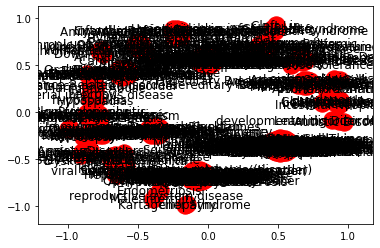

In [8]:
#draw the graph 
nx.draw_networkx(graph)

In [105]:
print(graph.nodes())

['Liver neoplasms', 'cancer', 'Congenital Heart Defects', 'cardiovascular system disease', 'Myocardial Infarction', 'Obesity', 'acquired metabolic disease', 'Berylliosis', 'respiratory system disease', 'Sarcoidosis', 'immune system disease', 'Psoriasis', 'integumentary system disease', 'Narcolepsy', 'sleep disorder', 'Hypercalcemia', 'Hemangiosarcoma', 'Medulloblastoma', 'Nephrotic Syndrome', 'urinary system disease', 'Cleft Lip', 'orofacial cleft', 'Cleft Palate', 'Carcinoma, Pancreatic Ductal', 'Nephrosis', 'Mouth Diseases', 'gastrointestinal system disease', 'Infarction, Middle Cerebral Artery', 'Hypertensive disease', 'Substance-Related Disorders', 'substance-related disorder', 'Polycystic Ovary Syndrome', 'polycystic ovary syndrome', 'Diabetic Neuropathies', 'nervous system disease', 'Anemia, Hemolytic', 'Leprosy', 'bacterial infectious disease', 'Marfan Syndrome', 'monogenic disease', 'Rheumatoid Arthritis', 'musculoskeletal system disease', 'Diabetic Retinopathy', 'Congenital oc

In [106]:
print(graph.edges())

[('Liver neoplasms', 'cancer'), ('cancer', 'Hemangiosarcoma'), ('cancer', 'Medulloblastoma'), ('cancer', 'Carcinoma, Pancreatic Ductal'), ('cancer', 'Astrocytoma'), ('cancer', 'Adenocarcinoma of lung (disorder)'), ('cancer', 'Malignant neoplasm of breast'), ('cancer', 'Mammary Neoplasms'), ('cancer', 'Pancreatic Neoplasm'), ('cancer', 'Neuroendocrine Tumors'), ('cancer', 'Neoplasms, Germ Cell and Embryonal'), ('cancer', 'Adenoid Cystic Carcinoma'), ('cancer', 'Squamous cell carcinoma of esophagus'), ('cancer', 'Meningioma'), ('cancer', 'melanoma'), ('cancer', 'Basal cell carcinoma'), ('cancer', 'Adenocarcinoma'), ('cancer', 'gliosarcoma'), ('cancer', 'Adrenocortical carcinoma'), ('cancer', 'Epithelial ovarian cancer'), ('cancer', 'Nephroblastoma'), ('cancer', 'Malignant neoplasm of ovary'), ('cancer', 'Testicular Germ Cell Tumor'), ('cancer', 'Brain Neoplasms'), ('cancer', 'Chronic Lymphocytic Leukemia'), ('cancer', 'Hodgkin Disease'), ('cancer', 'Adenocarcinoma Of Esophagus'), ('cance

In [9]:
plt.show()

The previous error shows  the graph is not connected. There number of groups aren't apparent, it may be possible if we can zoom into the large center grouping, meaning the diameter can not be calculated.

In [4]:
#alternate attempt to find subgraphs
S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]

NameError: name 'graph' is not defined

AttributeError: 'list' object has no attribute 'edges'

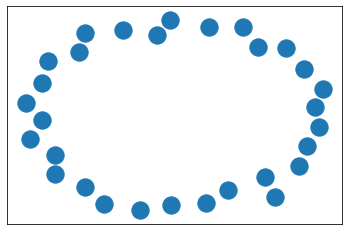

In [90]:
nx.draw_networkx(S)

In [10]:
#find sub graphs
subs_graphs = list(nx.connected_components(graph))

AttributeError: 'set' object has no attribute 'edges'

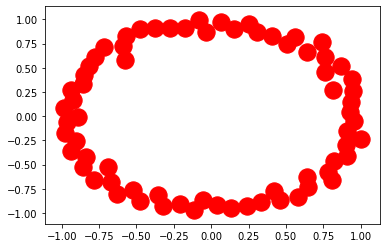

In [11]:
#show graphs
nx.draw_networkx(subs_graphs[0])
plt.show()

AttributeError: 'set' object has no attribute 'edges'

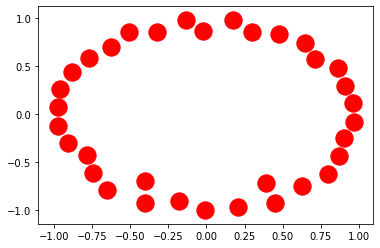

In [12]:
nx.draw_networkx(subs_graphs[1])
plt.show()

AttributeError: 'set' object has no attribute 'edges'

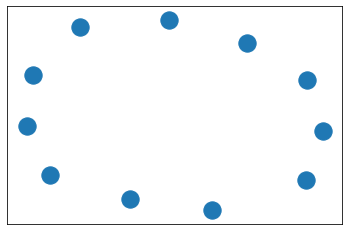

In [103]:
nx.draw_networkx(subs_graphs[2])
plt.show()

AttributeError: 'set' object has no attribute 'edges'

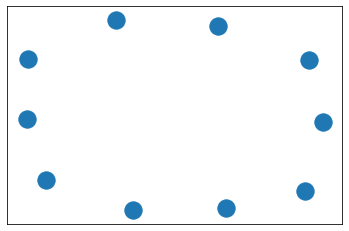

In [104]:
nx.draw_networkx(subs_graphs[3])
plt.show()

AttributeError: 'set' object has no attribute 'edges'

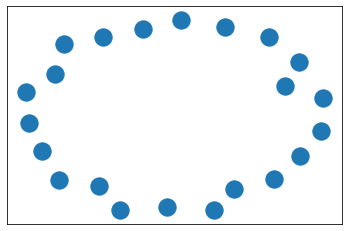

In [114]:
nx.draw_networkx(subs_graphs[4])
plt.show()

In [116]:
graph.subgraph(nodes).copy()

NameError: name 'nodes' is not defined